# 03 BMRA

Run BMRA based on global responses derived from the pathway activity predictions.

In [1]:
import pandas as pd
import numpy as np
import os
import bmra

In [5]:
data_dir_1 = "01_outputs_2020_cgga"
data_dir_2 = "02_outputs_2020_cgga"
info_dir = "/home/jing/Phd_project/project_GBM/gbm_Scripts/gbm_Scripts_bmra_gi1/01_outputs_2020_cgga"
out_dir = "03_outputs_2020_cgga"


os.makedirs(out_dir, exist_ok = True)

## Load data

### Global responses

Assembled from global responses calculated from predicted pathway activities, and DPD global responses.

In [6]:
def assemble_R_global(pathway_rglobal_file, dpd_rglobal_file):
    """
    Assemble full R_global matrix
    """
    R_global_modules_df = pd.read_csv(pathway_rglobal_file, index_col = 0)

    perts = R_global_modules_df.columns.tolist()

    R_global_DPD_df = pd.read_csv(dpd_rglobal_file, index_col=0).T

    # filter by perts list
    R_global_DPD_df = R_global_DPD_df[R_global_DPD_df.index.isin(perts)]

    # sort by perts list
    R_global_DPD_df["sort_col"] = R_global_DPD_df.index.map({val: i for i, val in enumerate(perts)})
    R_global_DPD_df = R_global_DPD_df.sort_values("sort_col")
    R_global_DPD_df = R_global_DPD_df.drop("sort_col", axis = 1)

    # transpose
    R_global_DPD_df = R_global_DPD_df.T

    R_global_df = pd.concat([R_global_modules_df, R_global_DPD_df])

    return R_global_df

In [7]:
R_global_df = assemble_R_global(
    pathway_rglobal_file = os.path.join(data_dir_2, "R_global_annotated.csv"),
    dpd_rglobal_file = os.path.join(data_dir_1, "R_global_DPDonly_annotated.csv"),
)

modules = R_global_df.index.tolist()
exp_ids = R_global_df.columns.tolist()

R_global = R_global_df.values
n_modules = R_global.shape[0]

print(R_global.shape)
display(R_global_df)

(13, 119)


,ASG002_GI1_24H:A10,ASG002_GI1_24H:A11,ASG002_GI1_24H:A12,ASG002_GI1_24H:A19,ASG002_GI1_24H:A20,ASG002_GI1_24H:A21,ASG002_GI1_24H:B10,ASG002_GI1_24H:B11,ASG002_GI1_24H:B12,ASG002_GI1_24H:B13,...,MOAR010_GI1_24H:J05,MOAR010_GI1_24H:J06,MOAR010_GI1_24H:J22,MOAR010_GI1_24H:J23,MOAR010_GI1_24H:J24,MOAR010_GI1_24H:K08,MOAR010_GI1_24H:K09,MOAR011_GI1_24H:F07,MOAR011_GI1_24H:F08,MOAR011_GI1_24H:F09
CDK1,-0.533408,-0.091122,0.000073,0.001598,-0.164698,-0.123390,-0.069064,-0.325147,-0.247632,-0.445555,...,0.010857,0.087816,-0.291711,-0.011566,-0.192878,-0.152299,-0.031306,-0.327067,-0.076895,0.065275
CDK2,-0.008156,0.057244,-0.005956,-0.475751,-0.262179,-0.051838,0.085078,-0.154491,0.069830,0.035554,...,-0.090894,0.016102,-0.005975,-0.236577,0.066263,0.037357,-0.112649,0.018635,0.008821,0.040558
CDK4_6,-0.941200,-0.162896,-0.009183,-0.311703,-0.338388,-0.200765,-0.293750,-0.374341,-0.441494,-1.003411,...,0.106203,-0.036883,-0.010615,0.127417,-0.141927,-0.201117,-0.247033,-0.197951,-0.203202,0.120236
PI3K,-1.990542,-1.521057,-1.287770,-1.775872,-1.244250,-0.536761,-0.145059,-0.251675,-0.607908,-0.554744,...,0.157741,-0.320781,-0.190377,-0.158643,-0.403793,-0.150622,-0.250384,-0.732725,-0.331865,0.071430
ERK,-1.093333,-0.436228,-0.340494,-0.634265,-0.342910,-0.709084,-0.445084,-1.049589,-0.583134,-1.165706,...,-0.066403,0.098467,-0.047738,0.111746,0.037392,-0.074054,-0.079529,-0.294749,-0.363768,-0.007878
Hypoxia,-0.254376,0.023122,0.058504,0.041085,-0.035473,-0.038286,0.084476,-0.108951,-0.036378,-0.157845,...,-0.115812,-0.009774,0.055337,-0.090489,-0.061701,-0.036901,0.081746,-0.023143,-0.003982,-0.022765
PDGFR,-1.043836,0.086879,0.250074,-0.015853,-0.287542,-0.056167,0.181117,-0.498719,0.004448,-0.279797,...,0.174611,-0.002382,0.211532,0.135977,0.031590,0.232393,0.105611,-0.087704,-0.097829,0.006360
Aurora,-0.175508,0.164342,0.097616,0.043912,-0.156369,-0.190604,-0.366462,-0.468757,0.027359,-0.871402,...,0.098359,0.134676,0.186001,0.250447,0.004023,0.192998,-0.001498,-0.352422,-0.148190,0.352141
Estrogen,-0.058632,-0.011456,-0.115421,0.024613,0.167272,-0.594548,-0.041064,0.053876,-0.049905,0.112325,...,0.133499,0.177830,0.177686,0.138073,-0.491883,0.212810,-0.405375,-0.401116,0.000936,-0.041481
EGFR,-0.398011,-0.015845,0.173159,-0.191456,-0.109141,0.117046,0.129847,-0.610209,0.143537,-1.268097,...,0.052904,-0.347726,-0.445773,-0.125110,-0.109984,-0.199341,-0.212445,-0.203895,-0.158802,0.030774


In [8]:
print(R_global_df.values.min())
print(R_global_df.values.max())

-26.23696888971179
36.75787314373195


### Perturbation matrix

In [9]:
inhib_conc_df = pd.read_csv(os.path.join(data_dir_1, "inhib_conc_annotated.csv"), index_col = 0)
#LFC_PLCg = pd.read_csv(os.path.join(info_dir,"PLCg_Data_log_2020.csv"),index_col=0)
#inhib_conc = inhib_conc_df.drop(columns=LFC_PLCg.index).values
inhib_conc = inhib_conc_df.values

n_DPDs = R_global.shape[0] - inhib_conc.shape[0]

pert_modules = np.where(inhib_conc != 0, 1, 0)
pert_DPD = np.zeros((n_DPDs, len(exp_ids)))

pert = np.vstack([pert_modules, pert_DPD])

print(pert.shape)
print(pert)

(13, 119)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Networks

In [23]:
# empty prior
#G_prior = np.zeros((n_modules, n_modules))
G_prior_df = pd.read_excel("/home/jing/Phd_project/project_GBM/gbm_OUTPUT/gbm_OUTPUT_LINCS/gbm_STVs.xlsx", sheet_name = "prior_network", index_col = 0)

G_prior = G_prior_df.values
G_prior_df

,CDK1,CDK2,CDK4_6,p53,EGFR,Aurora,Estrogen,PDGFR,Hypoxia,ERK,PI3K,GBM_onc,GBM_survival
CDK1,0,0,0,0,0,0,0,0,0,0,0,0,0
CDK2,0,0,0,0,0,0,0,0,0,0,0,0,0
CDK4_6,0,0,0,0,0,0,0,0,0,0,0,0,0
p53,0,0,0,0,0,0,0,0,0,0,0,0,0
EGFR,0,0,0,0,0,0,0,0,0,0,0,0,0
Aurora,0,0,0,0,0,0,0,0,0,0,0,0,0
Estrogen,0,0,0,0,0,0,0,0,0,0,0,0,0
PDGFR,0,0,0,0,0,0,0,0,0,0,0,0,0
Hypoxia,0,0,0,0,0,0,0,0,0,0,0,0,0
ERK,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
G_prior_df.shape

(13, 13)

In [8]:
#G_prior_r_df = pd.read_excel(os.path.join(info_dir, "ALL_DATA_2020.xlsx"), sheet_name = "prior_r", index_col = 0)

#G_prior_r = G_prior_r_df.values
#G_prior_r_df

In [25]:
G_not = np.eye(n_modules)
G_not[:, n_modules - n_DPDs :] = 1

G_not

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.]])

## Run BMRA

In [26]:
n_gibbs = 200_000
n_window = 5_000

mode = "all"
n_iterations = 1

In [27]:
G_prior

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [28]:
A_mean, A_sd, r_mean, r_sd = bmra.run_bmra(R_global,
            pert,
            G_prior,
            G_not,
            #r_prior = G_prior_r,
            n_gibbs = n_gibbs,
            n_window = n_window,
            mode = mode,
            n_iterations = n_iterations,
        )

A_mean_df = pd.DataFrame(A_mean, index = modules, columns = modules)
A_sd_df = pd.DataFrame(A_sd, index = modules, columns = modules)
r_mean_df = pd.DataFrame(r_mean, index = modules, columns = modules)
r_sd_df = pd.DataFrame(r_sd, index = modules, columns = modules)

display(A_mean_df)
display(A_sd_df)
display(r_mean_df)
display(r_sd_df)

A_mean_df.to_csv(os.path.join(out_dir, "A_mean.csv"))
A_sd_df.to_csv(os.path.join(out_dir, "A_sd.csv"))
r_mean_df.to_csv(os.path.join(out_dir, "r_mean.csv"))
r_sd_df.to_csv(os.path.join(out_dir, "r_sd.csv"))

,CDK1,CDK2,CDK4_6,PI3K,ERK,Hypoxia,PDGFR,Aurora,Estrogen,EGFR,p53,GBM_onc,GBM_survival
CDK1,0.000000,1.000000,1.000000,1.000000,1.000000,0.000215,0.000691,0.001565,0.000316,0.000609,0.027712,0.0,0.0
CDK2,1.000000,0.000000,0.000000,0.000000,1.000000,0.135568,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
CDK4_6,1.000000,0.000000,0.000000,0.868582,1.000000,0.000000,1.000000,0.122000,0.000000,0.390520,0.000000,0.0,0.0
PI3K,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000569,0.000000,0.0,0.0
ERK,1.000000,0.000000,0.767002,0.240023,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.0,0.0
Hypoxia,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
PDGFR,0.000000,0.994358,1.000000,0.305156,0.812472,0.117214,0.000000,0.000000,0.000000,1.000000,1.000000,0.0,0.0
Aurora,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.023087,0.0,0.0
Estrogen,0.469904,0.000257,0.028189,0.002575,0.023867,0.000000,0.765345,0.267731,0.000000,0.000207,0.223375,0.0,0.0
EGFR,0.916177,0.000000,0.000000,0.000000,0.000000,0.004621,1.000000,1.000000,0.120805,0.000000,0.000000,0.0,0.0


,CDK1,CDK2,CDK4_6,PI3K,ERK,Hypoxia,PDGFR,Aurora,Estrogen,EGFR,p53,GBM_onc,GBM_survival
CDK1,0.000000e+00,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,1.464759e-02,2.626873e-02,3.952966e-02,1.776383e-02,2.467061e-02,1.641471e-01,0.0,0.0
CDK2,1.110223e-15,0.000000e+00,0.000000e+00,0.000000e+00,1.110223e-15,3.423291e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
CDK4_6,6.661338e-16,0.000000e+00,0.000000e+00,3.378571e-01,6.661338e-16,0.000000e+00,6.661338e-16,3.272859e-01,0.000000e+00,4.878669e-01,0.000000e+00,0.0,0.0
PI3K,0.000000e+00,2.220446e-16,2.220446e-16,0.000000e+00,2.220446e-16,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.384915e-02,0.000000e+00,0.0,0.0
ERK,1.554312e-15,0.000000e+00,4.227412e-01,4.270973e-01,0.000000e+00,0.000000e+00,1.554312e-15,1.554312e-15,0.000000e+00,0.000000e+00,1.554312e-15,0.0,0.0
Hypoxia,0.000000e+00,0.000000e+00,0.000000e+00,4.440892e-16,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
PDGFR,0.000000e+00,7.489977e-02,1.221245e-15,4.604736e-01,3.903349e-01,3.216750e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.221245e-15,1.221245e-15,0.0,0.0
Aurora,0.000000e+00,0.000000e+00,2.220446e-15,0.000000e+00,2.220446e-15,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.220446e-15,1.501783e-01,0.0,0.0
Estrogen,4.990934e-01,1.602695e-02,1.655136e-01,5.067559e-02,1.526341e-01,0.000000e+00,4.237830e-01,4.427768e-01,0.000000e+00,1.437247e-02,4.165079e-01,0.0,0.0
EGFR,2.771215e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.781733e-02,3.552714e-15,3.552714e-15,3.259009e-01,0.000000e+00,0.000000e+00,0.0,0.0


,CDK1,CDK2,CDK4_6,PI3K,ERK,Hypoxia,PDGFR,Aurora,Estrogen,EGFR,p53,GBM_onc,GBM_survival
CDK1,0.000000,0.331359,0.232641,0.122477,0.097971,0.000004,0.000009,-0.000033,-0.000009,-0.000009,-0.001090,0.0,0.0
CDK2,0.438576,0.000000,0.000000,0.000000,-0.102127,0.011914,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
CDK4_6,0.324255,0.000000,0.000000,0.114815,0.159718,0.000000,0.187925,0.011439,0.000000,0.037842,0.000000,0.0,0.0
PI3K,0.000000,0.531964,0.289188,0.000000,0.182097,0.000000,0.000000,0.000000,0.000000,0.000034,0.000000,0.0,0.0
ERK,0.434360,0.000000,0.212661,0.039562,0.000000,0.000000,0.244626,0.264554,0.000000,0.000000,0.196500,0.0,0.0
Hypoxia,0.000000,0.000000,0.000000,0.175313,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
PDGFR,0.000000,-0.392161,0.381169,0.059519,0.148435,0.019116,0.000000,0.000000,0.000000,0.258148,-0.236041,0.0,0.0
Aurora,0.000000,0.000000,0.294287,0.000000,0.228767,0.000000,0.000000,0.000000,0.000000,0.259967,-0.002199,0.0,0.0
Estrogen,-0.075828,-0.000013,-0.004287,-0.000234,-0.002421,0.000000,0.078066,0.033967,0.000000,0.000011,0.021005,0.0,0.0
EGFR,0.214918,0.000000,0.000000,0.000000,0.000000,0.000582,0.184559,0.175588,-0.027682,0.000000,0.000000,0.0,0.0


,CDK1,CDK2,CDK4_6,PI3K,ERK,Hypoxia,PDGFR,Aurora,Estrogen,EGFR,p53,GBM_onc,GBM_survival
CDK1,0.000000,0.070969,0.036115,0.029789,0.025040,0.000280,0.000549,0.000989,0.000555,0.000486,0.007162,0.0,0.0
CDK2,0.017172,0.000000,0.000000,0.000000,0.008623,0.030955,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
CDK4_6,0.049626,0.000000,0.000000,0.052930,0.030224,0.000000,0.029916,0.032306,0.000000,0.050026,0.000000,0.0,0.0
PI3K,0.000000,0.026616,0.020739,0.000000,0.013984,0.000000,0.000000,0.000000,0.000000,0.001412,0.000000,0.0,0.0
ERK,0.050670,0.000000,0.126998,0.072299,0.000000,0.000000,0.034973,0.038364,0.000000,0.000000,0.025823,0.0,0.0
Hypoxia,0.000000,0.000000,0.000000,0.001418,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
PDGFR,0.000000,0.092684,0.062997,0.093710,0.080665,0.054683,0.000000,0.000000,0.000000,0.035020,0.032187,0.0,0.0
Aurora,0.000000,0.000000,0.035052,0.000000,0.023979,0.000000,0.000000,0.000000,0.000000,0.022375,0.014520,0.0,0.0
Estrogen,0.085968,0.002046,0.026381,0.004845,0.016373,0.000000,0.051475,0.058288,0.000000,0.000745,0.041657,0.0,0.0
EGFR,0.081977,0.000000,0.000000,0.000000,0.000000,0.008702,0.039818,0.045447,0.076472,0.000000,0.000000,0.0,0.0


In [29]:
np.fill_diagonal(r_mean_df.values,-1)
rm_minus_inv = pd.DataFrame(np.linalg.pinv(r_mean_df),index=r_mean_df.index,columns=r_mean_df.columns)*(-1)
rm_minus_inv.to_csv(os.path.join(out_dir, 'r_minv.csv'))
display(rm_minus_inv)

,CDK1,CDK2,CDK4_6,PI3K,ERK,Hypoxia,PDGFR,Aurora,Estrogen,EGFR,p53,GBM_onc,GBM_survival
CDK1,1.646798,0.622087,0.655035,0.305197,0.317505,0.011673,0.219164,0.110788,0.000259,0.110162,0.008624,2.070487e-15,5.941520e-17
CDK2,0.591636,1.233918,0.172769,0.095160,-0.020930,0.015332,0.032506,-0.001191,-0.005240,0.014617,-0.012538,6.057505e-16,1.385007e-17
CDK4_6,0.957098,0.317740,1.678188,0.360094,0.508805,0.013236,0.486943,0.195474,-0.013089,0.240029,-0.016707,5.685804e-16,-1.442539e-17
PI3K,0.827495,0.820734,0.784338,1.228327,0.423199,0.015074,0.272565,0.145206,0.002982,0.137826,0.017663,1.330777e-16,-8.598944e-17
ERK,1.295821,0.397827,1.137325,0.403987,1.577094,0.016969,0.628469,0.490405,0.052480,0.332771,0.160165,4.129437e-16,5.785923e-17
Hypoxia,0.145071,0.143885,0.137505,0.215342,0.074192,1.002643,0.047784,0.025456,0.000523,0.024163,0.003097,2.148528e-16,-6.769352e-17
PDGFR,0.485017,-0.260590,0.887683,0.250322,0.474041,0.024163,1.413879,0.211578,-0.106489,0.453585,-0.243815,3.462742e-16,-1.309850e-16
Aurora,0.726679,0.216730,0.872610,0.238077,0.576600,0.010198,0.384306,1.242243,-0.005304,0.455173,0.018955,4.943947e-18,-5.884054e-17
Estrogen,-0.066198,-0.059052,0.040944,0.004032,0.031309,0.001233,0.100084,0.049813,1.000232,0.040347,0.003501,-5.993742e-17,9.912870e-17
EGFR,0.572955,0.125377,0.456775,0.153609,0.256147,0.009308,0.372783,0.279618,-0.048217,1.186209,-0.039912,3.897475e-18,7.194173e-17


In [30]:
con_mat = pd.DataFrame(columns=['From','To','Strength'])
for con_to in r_mean_df.index:
    for con_from in r_mean_df.columns:
        if ((r_mean_df.loc[con_to,con_from] != 0) & (con_from != con_to)):
            row_df = pd.DataFrame([[con_from,con_to,r_mean_df.loc[con_to,con_from]]],columns=['From','To','Strength'])
            if con_mat.empty:
                con_mat = row_df.copy()
            else:
                con_mat = pd.concat([con_mat,row_df],axis=0,ignore_index=True)
            #con_mat = con_mat.append({'From':con_from,'To':con_to,'Strength':r_mean_df.loc[con_to,con_from]},ignore_index=True)
con_mat.to_csv(os.path.join(out_dir, 'r_net.txt'),sep='\t',index=False)
display(con_mat)

,From,To,Strength
0,CDK2,CDK1,0.331359
1,CDK4_6,CDK1,0.232641
2,PI3K,CDK1,0.122477
3,ERK,CDK1,0.097971
4,Hypoxia,CDK1,0.000004
...,...,...,...
64,CDK2,GBM_onc,-1.235660
65,Hypoxia,GBM_onc,-0.293833
66,Aurora,GBM_onc,-0.237753
67,p53,GBM_onc,0.014042


In [31]:
# now the same but with filtered matrices
# threshold value
Athr = 0.5

rm_filt = r_mean_df[np.abs(A_mean_df) > Athr].fillna(0).copy()
np.fill_diagonal(rm_filt.values,-1)
rm_filt.to_csv(os.path.join(out_dir, 'r_mean_filt.csv'))
display(rm_filt)

rm_filt_minus_inv = pd.DataFrame(np.linalg.pinv(rm_filt),index=rm_filt.index,columns=rm_filt.columns)*(-1)
rm_filt_minus_inv.to_csv(os.path.join(out_dir, 'r_minv_filt.csv'))
display(rm_minus_inv)

con_mat = pd.DataFrame(columns=['From','To','Strength'])
for con_to in rm_filt.index:
    for con_from in rm_filt.columns:
        if ((rm_filt.loc[con_to,con_from] != 0) & (con_from != con_to)):
            row_df = pd.DataFrame([[con_from,con_to,rm_filt.loc[con_to,con_from]]],columns=['From','To','Strength'])
            if con_mat.empty:
                con_mat = row_df.copy()
            else:
                con_mat = pd.concat([con_mat,row_df],axis=0,ignore_index=True)
            #con_mat = con_mat.append({'From':con_from,'To':con_to,'Strength':r_mean_df.loc[con_to,con_from]},ignore_index=True)
con_mat.to_csv(os.path.join(out_dir, 'r_net_filt.txt'),sep='\t',index=False)
#display(con_mat)


,CDK1,CDK2,CDK4_6,PI3K,ERK,Hypoxia,PDGFR,Aurora,Estrogen,EGFR,p53,GBM_onc,GBM_survival
CDK1,-1.000000,0.331359,0.232641,0.122477,0.097971,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
CDK2,0.438576,-1.000000,0.000000,0.000000,-0.102127,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
CDK4_6,0.324255,0.000000,-1.000000,0.114815,0.159718,0.000000,0.187925,0.000000,0.000000,0.000000,0.000000,0.0,0.0
PI3K,0.000000,0.531964,0.289188,-1.000000,0.182097,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
ERK,0.434360,0.000000,0.212661,0.000000,-1.000000,0.000000,0.244626,0.264554,0.000000,0.000000,0.196500,0.0,0.0
Hypoxia,0.000000,0.000000,0.000000,0.175313,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
PDGFR,0.000000,-0.392161,0.381169,0.000000,0.148435,0.000000,-1.000000,0.000000,0.000000,0.258148,-0.236041,0.0,0.0
Aurora,0.000000,0.000000,0.294287,0.000000,0.228767,0.000000,0.000000,-1.000000,0.000000,0.259967,0.000000,0.0,0.0
Estrogen,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078066,0.000000,-1.000000,0.000000,0.000000,0.0,0.0
EGFR,0.214918,0.000000,0.000000,0.000000,0.000000,0.000000,0.184559,0.175588,0.000000,-1.000000,0.000000,0.0,0.0


,CDK1,CDK2,CDK4_6,PI3K,ERK,Hypoxia,PDGFR,Aurora,Estrogen,EGFR,p53,GBM_onc,GBM_survival
CDK1,1.646798,0.622087,0.655035,0.305197,0.317505,0.011673,0.219164,0.110788,0.000259,0.110162,0.008624,2.070487e-15,5.941520e-17
CDK2,0.591636,1.233918,0.172769,0.095160,-0.020930,0.015332,0.032506,-0.001191,-0.005240,0.014617,-0.012538,6.057505e-16,1.385007e-17
CDK4_6,0.957098,0.317740,1.678188,0.360094,0.508805,0.013236,0.486943,0.195474,-0.013089,0.240029,-0.016707,5.685804e-16,-1.442539e-17
PI3K,0.827495,0.820734,0.784338,1.228327,0.423199,0.015074,0.272565,0.145206,0.002982,0.137826,0.017663,1.330777e-16,-8.598944e-17
ERK,1.295821,0.397827,1.137325,0.403987,1.577094,0.016969,0.628469,0.490405,0.052480,0.332771,0.160165,4.129437e-16,5.785923e-17
Hypoxia,0.145071,0.143885,0.137505,0.215342,0.074192,1.002643,0.047784,0.025456,0.000523,0.024163,0.003097,2.148528e-16,-6.769352e-17
PDGFR,0.485017,-0.260590,0.887683,0.250322,0.474041,0.024163,1.413879,0.211578,-0.106489,0.453585,-0.243815,3.462742e-16,-1.309850e-16
Aurora,0.726679,0.216730,0.872610,0.238077,0.576600,0.010198,0.384306,1.242243,-0.005304,0.455173,0.018955,4.943947e-18,-5.884054e-17
Estrogen,-0.066198,-0.059052,0.040944,0.004032,0.031309,0.001233,0.100084,0.049813,1.000232,0.040347,0.003501,-5.993742e-17,9.912870e-17
EGFR,0.572955,0.125377,0.456775,0.153609,0.256147,0.009308,0.372783,0.279618,-0.048217,1.186209,-0.039912,3.897475e-18,7.194173e-17


In [32]:
# number of zero elements in the matrix
display(len(rm_filt.index)*len(rm_filt.columns) - rm_filt.astype(bool).sum().sum())

117

In [33]:
# number of non-zero elements in the matrix
display(rm_filt.astype(bool).sum().sum() - len(modules))

39

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
rm_minus_inv=pd.read_csv(os.path.join(out_dir, 'r_minv.csv'),index_col=0)
display(rm_minus_inv)

,CDK1,CDK2,CDK4_6,PI3K,ERK,Hypoxia,PDGFR,Aurora,Estrogen,EGFR,p53,GBM_onc,GBM_survival
CDK1,1.646798,0.622087,0.655035,0.305197,0.317505,0.011673,0.219164,0.110788,0.000259,0.110162,0.008624,2.070487e-15,5.941520e-17
CDK2,0.591636,1.233918,0.172769,0.095160,-0.020930,0.015332,0.032506,-0.001191,-0.005240,0.014617,-0.012538,6.057505e-16,1.385007e-17
CDK4_6,0.957098,0.317740,1.678188,0.360094,0.508805,0.013236,0.486943,0.195474,-0.013089,0.240029,-0.016707,5.685804e-16,-1.442539e-17
PI3K,0.827495,0.820734,0.784338,1.228327,0.423199,0.015074,0.272565,0.145206,0.002982,0.137826,0.017663,1.330777e-16,-8.598944e-17
ERK,1.295821,0.397827,1.137325,0.403987,1.577094,0.016969,0.628469,0.490405,0.052480,0.332771,0.160165,4.129437e-16,5.785923e-17
Hypoxia,0.145071,0.143885,0.137505,0.215342,0.074192,1.002643,0.047784,0.025456,0.000523,0.024163,0.003097,2.148528e-16,-6.769352e-17
PDGFR,0.485017,-0.260590,0.887683,0.250322,0.474041,0.024163,1.413879,0.211578,-0.106489,0.453585,-0.243815,3.462742e-16,-1.309850e-16
Aurora,0.726679,0.216730,0.872610,0.238077,0.576600,0.010198,0.384306,1.242243,-0.005304,0.455173,0.018955,4.943947e-18,-5.884054e-17
Estrogen,-0.066198,-0.059052,0.040944,0.004032,0.031309,0.001233,0.100084,0.049813,1.000232,0.040347,0.003501,-5.993742e-17,9.912870e-17
EGFR,0.572955,0.125377,0.456775,0.153609,0.256147,0.009308,0.372783,0.279618,-0.048217,1.186209,-0.039912,3.897475e-18,7.194173e-17


In [36]:
rm_minus_inv.columns

Index(['CDK1', 'CDK2', 'CDK4_6', 'PI3K', 'ERK', 'Hypoxia', 'PDGFR', 'Aurora',
       'Estrogen', 'EGFR', 'p53', 'GBM_onc', 'GBM_survival'],
      dtype='object')

In [37]:
df_subset=rm_minus_inv[['CDK1', 'CDK2', 'CDK4_6', 'PI3K', 'ERK', 'Hypoxia', 'PDGFR', 'Aurora',
       'Estrogen', 'EGFR', 'p53']]
df_subset = df_subset.loc[['GBM_onc', 'GBM_survival']]

In [38]:
t_df_subset=df_subset.T

In [39]:
df_subset.reset_index(inplace=True)

In [40]:
df_subset

,index,CDK1,CDK2,CDK4_6,PI3K,ERK,Hypoxia,PDGFR,Aurora,Estrogen,EGFR,p53
0,GBM_onc,-1.700445,-1.901804,-0.761002,-0.376065,-0.275587,-0.321349,-0.248282,-0.351198,0.013358,-0.184188,0.021401
1,GBM_survival,-15.161426,-5.727314,-6.030648,-2.809834,-2.923145,-0.107464,-2.017757,-1.019984,-0.002382,-1.014216,-0.079400


Text(0.5, 1.0, 'Predicted global signaling pathway responses of GI1 cell line under conditions ')

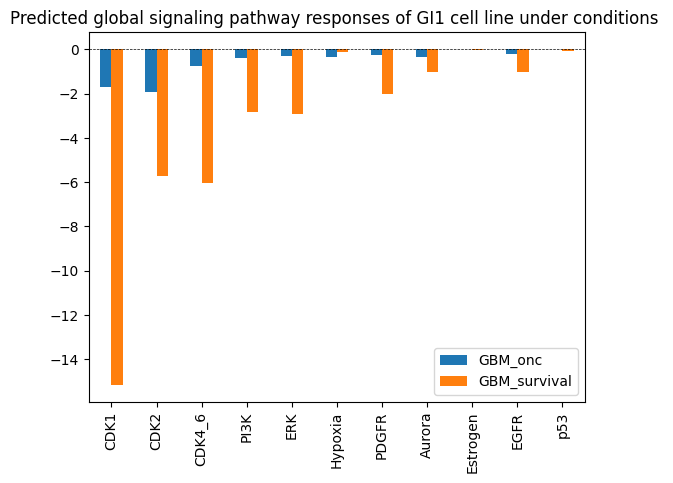

In [41]:
t_df_subset.plot.bar()
plt.axhline(y=0, linestyle='--', color='black',linewidth=0.5)
plt.title("Predicted global signaling pathway responses of GI1 cell line under conditions ")

In [42]:
rm_filt

,CDK1,CDK2,CDK4_6,PI3K,ERK,Hypoxia,PDGFR,Aurora,Estrogen,EGFR,p53,GBM_onc,GBM_survival
CDK1,-1.000000,0.331359,0.232641,0.122477,0.097971,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
CDK2,0.438576,-1.000000,0.000000,0.000000,-0.102127,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
CDK4_6,0.324255,0.000000,-1.000000,0.114815,0.159718,0.000000,0.187925,0.000000,0.000000,0.000000,0.000000,0.0,0.0
PI3K,0.000000,0.531964,0.289188,-1.000000,0.182097,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
ERK,0.434360,0.000000,0.212661,0.000000,-1.000000,0.000000,0.244626,0.264554,0.000000,0.000000,0.196500,0.0,0.0
Hypoxia,0.000000,0.000000,0.000000,0.175313,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
PDGFR,0.000000,-0.392161,0.381169,0.000000,0.148435,0.000000,-1.000000,0.000000,0.000000,0.258148,-0.236041,0.0,0.0
Aurora,0.000000,0.000000,0.294287,0.000000,0.228767,0.000000,0.000000,-1.000000,0.000000,0.259967,0.000000,0.0,0.0
Estrogen,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078066,0.000000,-1.000000,0.000000,0.000000,0.0,0.0
EGFR,0.214918,0.000000,0.000000,0.000000,0.000000,0.000000,0.184559,0.175588,0.000000,-1.000000,0.000000,0.0,0.0


In [43]:
display(rm_filt)
rm_subset=rm_filt[['CDK1', 'CDK2', 'CDK4_6', 'PI3K', 'ERK', 'Hypoxia', 'PDGFR', 'Aurora','Estrogen', 'EGFR', 'p53']]

,CDK1,CDK2,CDK4_6,PI3K,ERK,Hypoxia,PDGFR,Aurora,Estrogen,EGFR,p53,GBM_onc,GBM_survival
CDK1,-1.000000,0.331359,0.232641,0.122477,0.097971,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
CDK2,0.438576,-1.000000,0.000000,0.000000,-0.102127,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
CDK4_6,0.324255,0.000000,-1.000000,0.114815,0.159718,0.000000,0.187925,0.000000,0.000000,0.000000,0.000000,0.0,0.0
PI3K,0.000000,0.531964,0.289188,-1.000000,0.182097,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
ERK,0.434360,0.000000,0.212661,0.000000,-1.000000,0.000000,0.244626,0.264554,0.000000,0.000000,0.196500,0.0,0.0
Hypoxia,0.000000,0.000000,0.000000,0.175313,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
PDGFR,0.000000,-0.392161,0.381169,0.000000,0.148435,0.000000,-1.000000,0.000000,0.000000,0.258148,-0.236041,0.0,0.0
Aurora,0.000000,0.000000,0.294287,0.000000,0.228767,0.000000,0.000000,-1.000000,0.000000,0.259967,0.000000,0.0,0.0
Estrogen,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078066,0.000000,-1.000000,0.000000,0.000000,0.0,0.0
EGFR,0.214918,0.000000,0.000000,0.000000,0.000000,0.000000,0.184559,0.175588,0.000000,-1.000000,0.000000,0.0,0.0


In [44]:
rm_subset

,CDK1,CDK2,CDK4_6,PI3K,ERK,Hypoxia,PDGFR,Aurora,Estrogen,EGFR,p53
CDK1,-1.000000,0.331359,0.232641,0.122477,0.097971,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CDK2,0.438576,-1.000000,0.000000,0.000000,-0.102127,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CDK4_6,0.324255,0.000000,-1.000000,0.114815,0.159718,0.000000,0.187925,0.000000,0.000000,0.000000,0.000000
PI3K,0.000000,0.531964,0.289188,-1.000000,0.182097,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ERK,0.434360,0.000000,0.212661,0.000000,-1.000000,0.000000,0.244626,0.264554,0.000000,0.000000,0.196500
Hypoxia,0.000000,0.000000,0.000000,0.175313,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PDGFR,0.000000,-0.392161,0.381169,0.000000,0.148435,0.000000,-1.000000,0.000000,0.000000,0.258148,-0.236041
Aurora,0.000000,0.000000,0.294287,0.000000,0.228767,0.000000,0.000000,-1.000000,0.000000,0.259967,0.000000
Estrogen,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078066,0.000000,-1.000000,0.000000,0.000000
EGFR,0.214918,0.000000,0.000000,0.000000,0.000000,0.000000,0.184559,0.175588,0.000000,-1.000000,0.000000


In [45]:
rm_subset=rm_subset.loc[['GBM_onc','GBM_survival']]
rm_subset=rm_subset.T
display(rm_subset)

,GBM_onc,GBM_survival
CDK1,-0.459298,-9.20661
CDK2,-1.235660,0.00000
CDK4_6,0.000000,0.00000
PI3K,0.000000,0.00000
ERK,0.000000,0.00000
Hypoxia,-0.293833,0.00000
PDGFR,0.000000,0.00000
Aurora,-0.237753,0.00000
Estrogen,0.000000,0.00000
EGFR,0.000000,0.00000


Text(0.5, 1.0, 'Predicted local signaling pathway responses of GI1 cell line under conditions ')

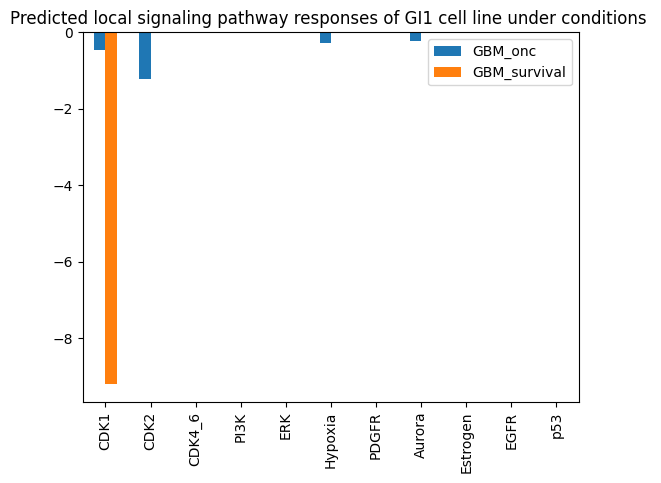

In [46]:
rm_subset.plot.bar()
plt.axhline(y=0, linestyle='--', color='black',linewidth=0.5)
plt.title("Predicted local signaling pathway responses of GI1 cell line under conditions ")